# Hackathon 2

In the first exercise, you will develop a model for estimating the cooling/heating load indexes of a building from its characteristics. These indexes serve as reference to adapt the power of air conditioning systems. In the second exercise, you will forecast the hourly electric power consumption in Spain. Electricity being not storable, predicting the electric consumption is a crucial matter for energy producers. You will develop an autoregressive model for this purpose. 

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1:

Part. 2:

Part. 3:

Part. 4:


## Regression

When designing a building, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. Architects and building designers need information about the characteristics of the building and of the conditioned space. For this reason, we  investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.
The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

Features: RelativeCompactness, SurfaceArea ,WallArea, RoofArea, OverallHeight, Orientation, GlazingArea, GlazingAreaDistribution.

Prediction: HeatingLoad, CoolingLoad



In [6]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

---
1) Report useful statistics for each variables (mean, std, heatmap of correlations,...)

In [7]:
#code here

Comments

---
2)	Add a constant term (intercept) and perform a linear regression of the variable CoolingLoad on all other explanatory variables. Use  the library statsmodels.

i. Report the F statistics and R2: interpret them. 

ii. Analyze the t-statistics and p-values of each coefficient of regression.

Are all coefficients significant at 95%? Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).


In [8]:
#code here

Comments

---
3)	Remove non-significant coefficients except the intercept (e.g. with  𝛼  5%) and run again the regression. What do you notice when you compare the R2, log-likelihood, AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations)


In [9]:
#code here

Comments

## Auto-regressive model

In a paper released early 2019, forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure (see https://arxiv.org/abs/1906.05433).  The file “Data_energy_load.csv” contains 4 years of electrical consumption  for Spain in MW/h.  This was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data.

File format:

Date: dd-mm-yy, Hour : from 0 to 23. Weekday: from 1 (Monday)  to 7 (Sunday). Load: consumption in MW/h. Lm1: consumption 1h ago, Lm2: consumption 2h ago,… Lm14: consumption 14h ago

1)	Load the dataset and convert dates in datetime format (you can use the package datetime). Plot the time series of consumption, what do you observe?

       Date  Hour  Weekday     Load      Lm1      Lm2      Lm3      Lm4  \
0  02-01-15     0        6  27070.0  26798.0  29031.0  29571.0  29014.0   
1  02-01-15     1        6  24935.0  27070.0  26798.0  29031.0  29571.0   
2  02-01-15     2        6  23214.0  24935.0  27070.0  26798.0  29031.0   
3  02-01-15     3        6  22540.0  23214.0  24935.0  27070.0  26798.0   
4  02-01-15     4        6  22096.0  22540.0  23214.0  24935.0  27070.0   

       Lm5      Lm6      Lm7      Lm8      Lm9     Lm10     Lm11     LM12  \
0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0  24133.0   
1  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0   
2  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0   
3  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0   
4  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0   

      LM13     LM14            Datetime  
0  23547.0  22250.0 2015-01-02 00:00:00  
1 

array([<AxesSubplot:xlabel='Datetime'>], dtype=object)

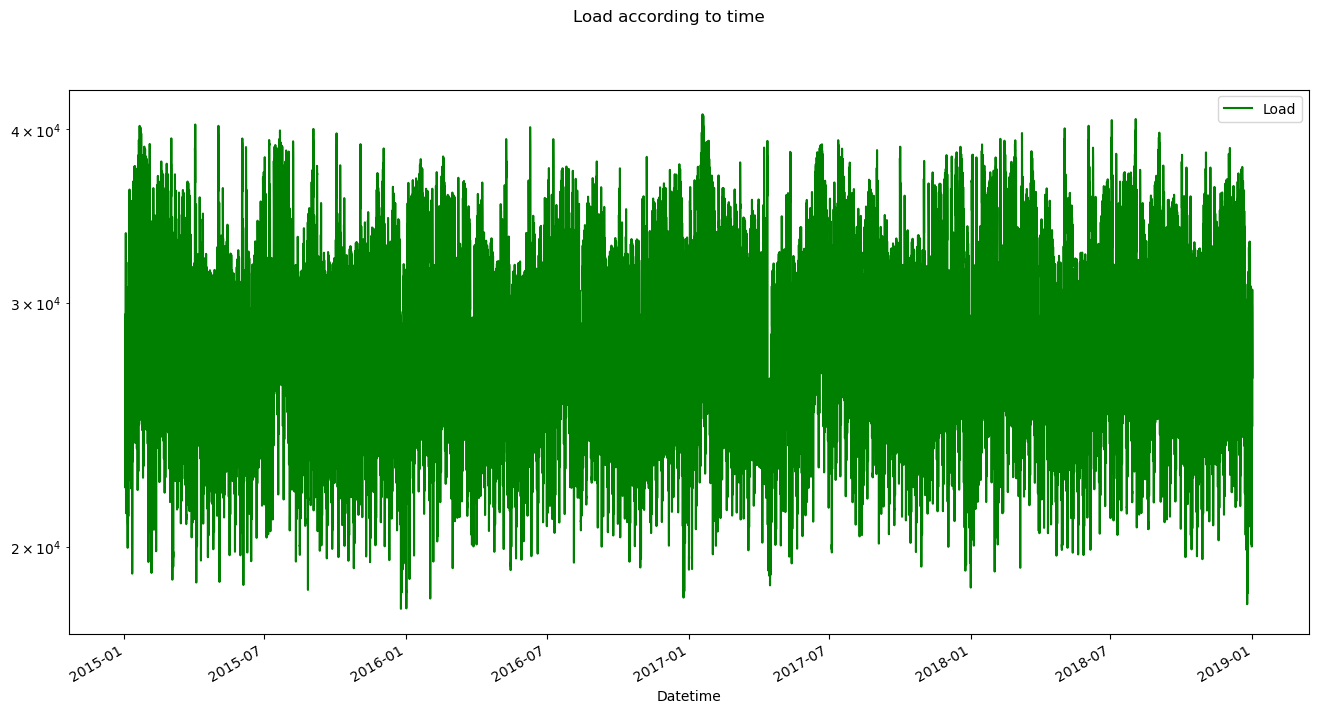

In [10]:
#code here
data_energy_load = pd.read_csv('Data_energy_load.csv', sep=';')

def date_to_datetime_object(data):
    newDatetime = np.array(data['Date'])
    for i in range(len(data['Date'])):
        tmp_date = data['Date'][i].split('-')
        tmp_time = int(data['Hour'][i])
        
        newDatetime[i] = dt.datetime(day=int(tmp_date[0]), month=int(tmp_date[1]), year=2000+int(tmp_date[2]), hour=tmp_time)
    data['Datetime'] = newDatetime
    
date_to_datetime_object(data_energy_load)

print(data_energy_load.head())
    
data_energy_load.plot(subplots=True, x='Datetime', y='Load', title="Load according to time", logy=True, color="green", figsize=(16,8))


Comments

---
2) We will regress the electric consumption (‘Load’) on the following covariates ‘Weekday’, ‘Hour’, ‘Lm1’, ‘Lm2’,…,’Lm14’. Plot the following graphs:

•	Average electric consumption per day (y axis) versus weekday (x axis)

•	Average electric consumption per hour(y axis) versus hour (x axis)

Based on these graphs, do you think that it is a good idea to regress linearly the consumption on variables ‘Hour’ and ‘Weekday’? 


In [11]:
#code here

Comments

---
3) We will slightly transform the dataset. We first add a constant column for the regression (column of ones). You also convert the variable ‘Hour’ into 23 (and not 24!) binary variables H1,…H23. You next convert the variable ‘Weekday’ into 6 (and not 7) variables W2,…,W7. Use the command get_dummies(.) from pandas. Why do we remove H0 and W1? Why do we do this conversion?

---

In [12]:
#code here

Comments

---
4) Split the dataset in

•	a training set with observations from 02-01-15 up to 01-12-2018 (included)

•	a test (or validation) set with observations from 02-12-2018 up to 31-12-2018.


In [13]:
#code here

---
If we denote by L(t) the consumption at time t, the model that we want to develop is 
$$L(t) = cst + \sum_{k=1}^{14} a_k L(t-k) +\sum_{k=2}^{7} b_k W_k + \sum_{k=1}^{23} c_k H_k    $$

o	Estimate this model with statsmodels on the training set. 

o	How would you judge the quality of the predictive model?

o	Compute the Mean Absolute Error (MAE) between predicted and real consumptions.



In [14]:
#code here

Comments

5) Use this model on the test set to forecast the electric consumption.

o	Compare on a graph, the forecast to  real consumptions on the given period. Plot also the errors of prediction.

o	Compute the MAE on the test set and the R2. Is the forecast reliable?

In [15]:
#code here

Comments

6) We want to check that the average consumption at 11h is significantly different (at 95%) from the average consumption at 13h. Perform a statistical test (explain which stat you use) and report the stat value, the pivot value(s) and the p-value.

In [16]:
#code here

Comments

7) The test of question 5 requires that variances are equal. Test if this assumption holds (95% confidence level). Report  the stat value, the pivot value (s).

In [17]:
#code here

Comments